In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
import joblib

In [2]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [7]:
df.drop(['Unnamed: 2' ,'Unnamed: 3' ,'Unnamed: 4'],axis=1,inplace=True)

In [8]:
df.rename(columns={'v1':'Labels', 'v2':'EmailText'},inplace=True)

In [9]:
print(df.shape)
df.head()

(5572, 2)


,Labels,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='Labels', ylabel='count'>

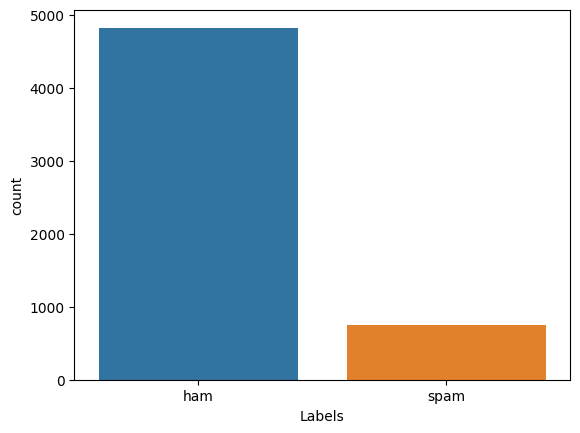

In [10]:
sns.countplot(data = df,x= 'Labels')

In [11]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['EmailText'])
y = df['Labels']

In [12]:
rs =RandomOverSampler(random_state=42)

In [13]:
X,y = rs.fit_resample(X,y)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)


SVC(kernel='linear')

In [16]:
y_pred = svc.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9979274611398964


In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       1.00      1.00      1.00       985
        spam       1.00      1.00      1.00       945

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



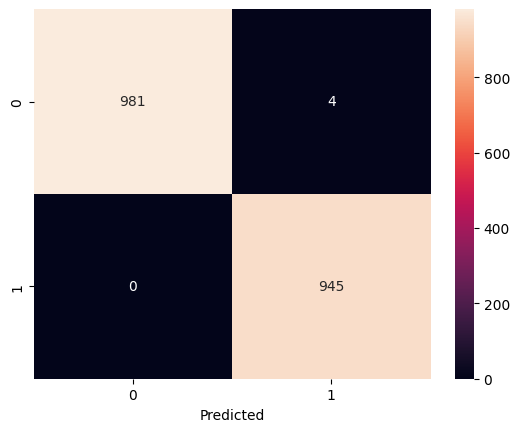

In [19]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True , fmt ="g")
plt.xlabel("Predicted")
plt.show("Actual")
plt.show()

In [18]:
joblib.dump(svc, 'spam_ham_svc_model_countvectorizer.pkl')
joblib.dump(vectorizer, 'count_vectorizer.pkl')

['count_vectorizer.pkl']